In [1]:
using PyPlot
using LinearAlgebra
using Statistics
using Measurements

A few normalization methods
--------------------------------

In [2]:
normalize_p_pmf(py)  = normalize_p_pmf!(copy(py))

normalize_p_pmf!(py) = normalize!(py, 1)

normalize_p_pdf(py, y) = normalize_p_pdf!(copy(py), y)

function normalize_p_pdf!(py::Vector{T}, y) where T<:Real
	npy = length(py)
	Δy  = diff(collect(y)) 
	@assert npy == length(y) 
	@assert all(py .>= 0) 
	@assert all(Δy .>= 0)
	c = zero(T) 
	for i in 1:npy-1
		mn, mx = extrema((py[i],py[i+1]))
		c += (mn + (mx - mn)/2) * Δy[i]
	end
	py ./= c
	return py
end


normalize_p_max(py) = normalize_p_max!(copy(py))

function normalize_p_max!(py)
	mx   = maximum(py)
	py ./= mx 
	return py 
end

normalize_p_max! (generic function with 1 method)

Binomial/Beta simulation, density
--------------------------------

In [3]:
binomial_loglike(y,n,θ) = y*log(θ) + (n-y)*log(1-θ)

bernoulli_rand(θ, sz...) = rand(sz...) .< θ

binomial_rand(n,θ) = sum(bernoulli_rand(θ,n))

function binomial_rand(n,θ, sz...)
	rtn = fill(-1,sz)
	for i in eachindex(rtn)
		rtn[i] = binomial_rand(n,θ)
	end 
	rtn
end

beta_logdensity(θ, φ1, φ2) = (φ1-1) * log(θ) + (φ2-1) * log(1-θ)

function beta_rand(α::Int,β::Int)
	X = sum(randn(2α).^2)
	Y = sum(randn(2β).^2)
	X/(X+Y)
end

function beta_rand(α::Int,β::Int, sz...)
	rtn = fill(-1.0,sz)
	for i in eachindex(rtn)
		rtn[i] = beta_rand(α::Int,β::Int)
	end 
	rtn
end

beta_rand (generic function with 2 methods)

Some examples of the above methods

In [4]:
n, θ, y = 100, 0.4, 5
α, β = 2, 4
@show binomial_loglike(y, n, θ)
@show beta_logdensity(θ,α,β)
@show bernoulli_rand(θ)
@show binomial_rand(n, θ)
@show beta_rand(α,β);

binomial_loglike(y, n, θ) = -53.10988791713989
beta_logdensity(θ, α, β) = -2.448767603172127
bernoulli_rand(θ) = true
binomial_rand(n, θ) = 42
beta_rand(α, β) = 0.19577804421424655


Here is how to use the extensions which fill an array of specified size with iid simulations

In [5]:
bernoulli_rand(θ, 5, 7)

5×7 BitArray{2}:
 0  1  0  1  0  0  1
 1  0  0  1  1  0  1
 1  1  0  1  0  0  1
 0  1  0  0  1  1  0
 0  0  0  1  1  0  0

In [6]:
binomial_rand(n, θ, 5,7)

5×7 Array{Int64,2}:
 35  43  34  40  40  34  38
 42  44  39  41  41  43  37
 54  39  34  44  35  40  43
 41  41  35  38  41  37  41
 35  42  39  50  45  33  37

In [7]:
beta_rand(α, β, 5, 7)

5×7 Array{Float64,2}:
 0.172667  0.145215  0.389985  0.319716   0.0602992  0.142905  0.090379
 0.603071  0.479368  0.291558  0.705283   0.0812558  0.348675  0.16803
 0.304097  0.28359   0.463379  0.649019   0.38195    0.169418  0.181806
 0.158644  0.400037  0.141448  0.952509   0.255848   0.594947  0.613991
 0.24717   0.36361   0.201615  0.0745008  0.5135     0.209114  0.584569

Quiz (for 05-21-2020)
================================

## Question 1: 
Find $E(1/(x+1))$ where $x \sim Beta(4,5)$.

In [27]:
#📌####### code up the solution here (note: you can use simulations)
x = beta_rand(4,5,1000,100)
x = 1 ./ (x .+ 1)
mean(x) ± 3std(x)/√(size(x)[1] * size(x)[2])

0.70036 ± 0.00073

## Question 2: 
Find $P(e^x > 3/2)$ where $x \sim Beta(4,5)$.

In [34]:
#📌####### code up the solution here (note: you can use simulations)
nsims = 100_000
betasims = beta_rand(4, 5, nsims)
y = exp.(betasims) .> 3/2
mean(y) ± 3std(y)/√(nsims)

0.5808 ± 0.0047

## Question 3: 
Suppose $y|\theta ∼ Binomial(n=10,\theta)$ and $\theta$ has prior log density
 given as follows (up to an additive constant)

In [10]:
quiz_logprior(θ) =  log(1.5 + sin(4π*θ))

quiz_logprior (generic function with 1 method)

Here is a plot of `quiz_logprior(θ)` on a grid of $\theta$ values

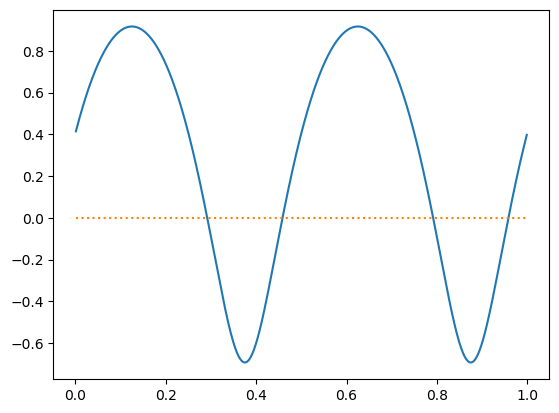

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x13bac5b90>

In [11]:
quiz_θgrid = range(0,1,length=1000)[2:end-1] 
plot(quiz_θgrid, quiz_logprior.(quiz_θgrid))
plot(quiz_θgrid, quiz_θgrid .* 0, ":")

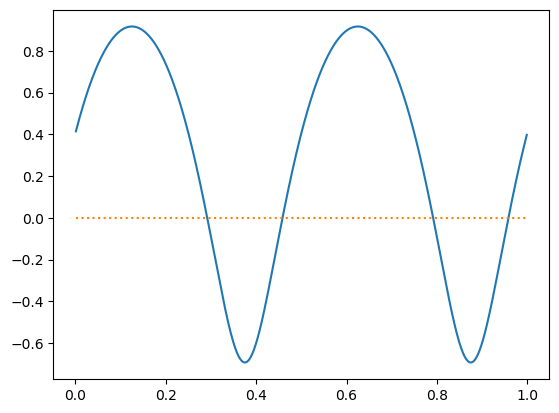

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d4fbb50>

In [37]:
quiz_θgrid = range(0,1,length=1000)[2:end-1] 
plot(quiz_θgrid, quiz_logprior.(quiz_θgrid))
plot(quiz_θgrid, quiz_θgrid .* 0, ":")

Now given an observation $y = 8$ find the posterior expected value of $\theta$, i.e. find $E(\theta | y)$.

In [35]:
#📌####### code up the solution here (note: you can use simulations)
quiz_logpθ = quiz_logprior.(quiz_θgrid) .+ binomial_loglike.(8, 10, quiz_θgrid)
quiz_pθ = exp.(quiz_logpθ)
normalize_p_pmf!(quiz_pθ)
sum(quiz_pθ .* quiz_θgrid)

0.7052738230484876

In [36]:
#📌####### Here is another way to solve the above problem
θi     = quiz_θgrid    # grid of θ's 
dθi    = θi[2] -θi[1]  # grid spacing
logpθi = quiz_logprior.(θi) .+ binomial_loglike.(8, 10, θi)
pθi    = normalize_p_pdf(exp.(logpθi), θi)  # pdf normalization instead of pmf normalization
sum(θi .* pθi .* dθi)  # Riemann sum approx to the integral of θ*p(θ)

0.705274011263701

Homework (due 05-27-2020)
================================

This problem explores using a Beta prior for Binomial data. 

The data for this exercise are the following win/losses for your favoriate team over the course of 
three seasons.

In [13]:
season1_wins_losses = (5,2)
season2_wins_losses = (7,2)
season3_wins_losses = (10,3)

(10, 3)

So, e.g., in season 2 the team won 7 games and lost 2. 

Suppose your team wins each game with probability $\theta \in (0,1)$, fixed over all seasons. Also suppose 
the games are independent so the number of wins is $Binomial(n,\theta)$ where $n$ is the number of 
games played.  No one knows the true value of $\theta$ but we are going to use Bayes  and the
historical wins/losses to quantify likely $\theta$ values (with a posterior distribution on $\theta$). 
Later in the notebook you will use this posterior distribution to investigate bets on your favoriate team 
in season 4 when Vegas posts odds for your team to win games in season 4.  

Remark: As your working this homework be sure to notice how natural the updating rules 
(from prior to posterior) are for the Beta hyper-parameters as one 
iteratively collects Binomial data.

Lets start by setting the prior parameters for $p(\theta) = Beta(\theta | 1,1)$

In [14]:
prior_betaφ    = (1,1)

(1, 1)

We can simulate from $p(\theta)$ to get an idea of the ensemble of likely $\theta$
values quantified by the prior.

In [15]:
some_possibleθ = beta_rand(prior_betaφ[1], prior_betaφ[2], 5,5)

5×5 Array{Float64,2}:
 0.548497  0.156519  0.100828  0.817814  0.515571
 0.129462  0.360307  0.274543  0.832269  0.518366
 0.518352  0.247593  0.962872  0.431723  0.119631
 0.920344  0.540193  0.966534  0.274134  0.00550187
 0.5487    0.813964  0.565028  0.176361  0.0892161

Lets convert these $\theta$ values from win probabilities to odds (rounded to be out of 100)

In [46]:
map(θ -> "$(round(Int,100*θ)):$(round(Int,100*(1-θ)))", some_possibleθ)

5×5 Array{String,2}:
 "55:45"  "16:84"  "10:90"  "82:18"  "52:48"
 "13:87"  "36:64"  "27:73"  "83:17"  "52:48"
 "52:48"  "25:75"  "96:4"   "43:57"  "12:88"
 "92:8"   "54:46"  "97:3"   "27:73"  "1:99"
 "55:45"  "81:19"  "57:43"  "18:82"  "9:91"

Using the fact that the Binomial likelihood function and the Beta density 
are conjugate we just need to update the Beta parameters for the posteior 
distributions after eash season

In [17]:
season1_betaφ   = prior_betaφ    .+ season1_wins_losses
season12_betaφ  = season1_betaφ  .+ season2_wins_losses 
season123_betaφ = season12_betaφ .+ season3_wins_losses

(23, 8)

In [54]:
season1_betaφ

(6, 3)

Here are some plots of the prior and posterior after each season with different normalizations

In [56]:
θs = range(0,1,length=1000)[2:end-1] 

prior_pθ  = exp.(beta_logdensity.(θs, prior_betaφ[1], prior_betaφ[2]))	
season1_pθ𝕀y = exp.(beta_logdensity.(θs, season1_betaφ[1], season1_betaφ[2]))	
season12_pθ𝕀y = exp.(beta_logdensity.(θs, season12_betaφ[1], season12_betaφ[2]))	
season123_pθ𝕀y = exp.(beta_logdensity.(θs, season123_betaφ[1], season123_betaφ[2]))

998-element Array{Float64,1}:
 1.0151135630152371e-66
 4.227920907029572e-60
 3.141114837350033e-56
 1.7485667504413563e-53
 2.353128412100501e-51
 1.2899506311741365e-49
 3.8048665298032425e-48
 7.130108467748212e-47
 9.448925205931944e-46
 9.52741060756556e-45
 7.700847569239747e-44
 5.185711159200399e-43
 2.995663285477602e-42
 ⋮
 2.7659665424411634e-14
 1.5381632059414946e-14
 8.070849642047382e-15
 3.947050551942457e-15
 1.7695023716940644e-15
 7.104669974744994e-16
 2.4691249106690277e-16
 7.045167590027248e-17
 1.510527224854546e-17
 2.0613658160918504e-18
 1.2334009936070436e-19
 9.850828308805955e-22

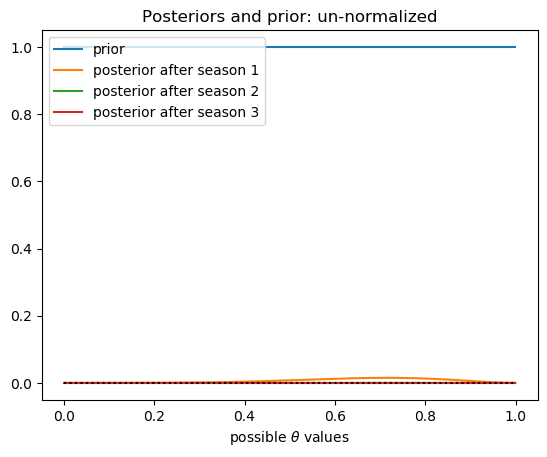

PyObject <matplotlib.legend.Legend object at 0x1445aca50>

In [69]:
fig, ax = subplots(1)
ax.plot(θs, prior_pθ, label="prior")
ax.plot(θs, season1_pθ𝕀y, label="posterior after season 1")
ax.plot(θs, season12_pθ𝕀y, label="posterior after season 2")
ax.plot(θs, season123_pθ𝕀y, label="posterior after season 3")
ax.plot(θs, 0 .* θs,"k:")
ax.set_xlabel(L"possible $\theta$ values")
ax.set_title("Posteriors and prior: un-normalized")
ax.legend(loc=2)

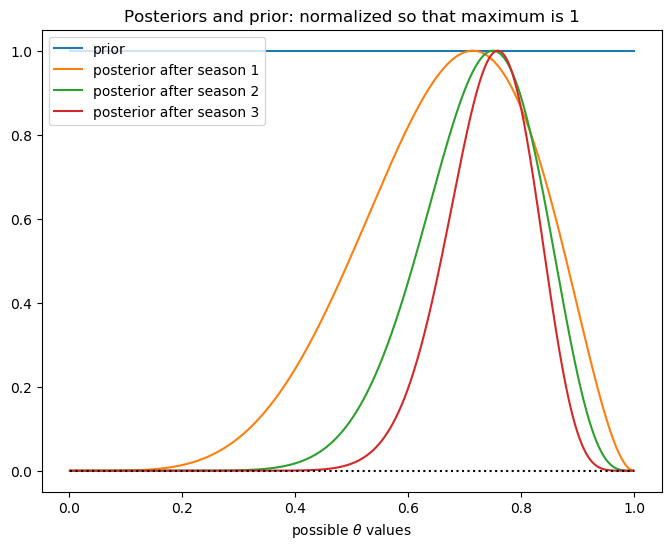

PyObject <matplotlib.legend.Legend object at 0x143936390>

In [20]:
normalize_p_max!(prior_pθ)
normalize_p_max!(season1_pθ𝕀y)
normalize_p_max!(season12_pθ𝕀y)
normalize_p_max!(season123_pθ𝕀y)

fig, ax = subplots(1,figsize=(8,6))
ax.plot(θs, prior_pθ, label="prior")
ax.plot(θs, season1_pθ𝕀y, label="posterior after season 1")
ax.plot(θs, season12_pθ𝕀y, label="posterior after season 2")
ax.plot(θs, season123_pθ𝕀y, label="posterior after season 3")
ax.plot(θs, 0 .* θs,"k:")
ax.set_xlabel(L"possible $\theta$ values")
ax.set_title("Posteriors and prior: normalized so that maximum is 1")
ax.legend(loc=2)

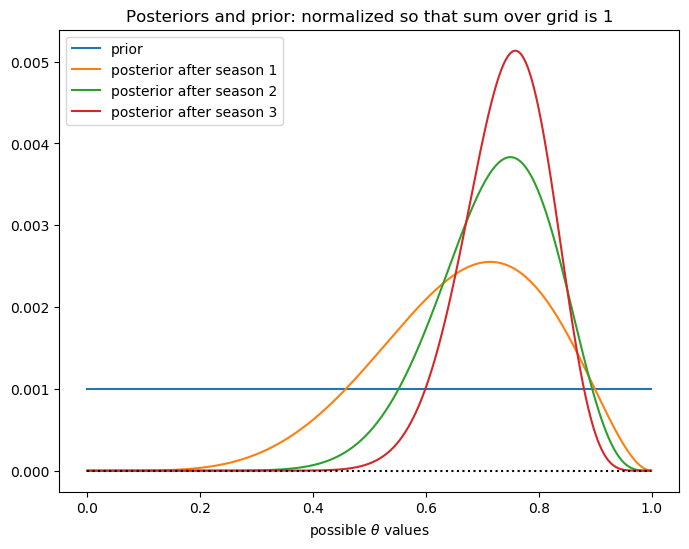

PyObject <matplotlib.legend.Legend object at 0x1456038d0>

In [80]:
normalize_p_pmf!(prior_pθ)
normalize_p_pmf!(season1_pθ𝕀y)
normalize_p_pmf!(season12_pθ𝕀y)
normalize_p_pmf!(season123_pθ𝕀y)

fig, ax = subplots(1,figsize=(8,6))
ax.plot(θs, prior_pθ, label="prior")
ax.plot(θs, season1_pθ𝕀y, label="posterior after season 1")
ax.plot(θs, season12_pθ𝕀y, label="posterior after season 2")
ax.plot(θs, season123_pθ𝕀y, label="posterior after season 3")
ax.plot(θs, 0 .* θs,"k:")
ax.set_xlabel(L"possible $\theta$ values")
ax.set_title("Posteriors and prior: normalized so that sum over grid is 1")
ax.legend(loc=2)

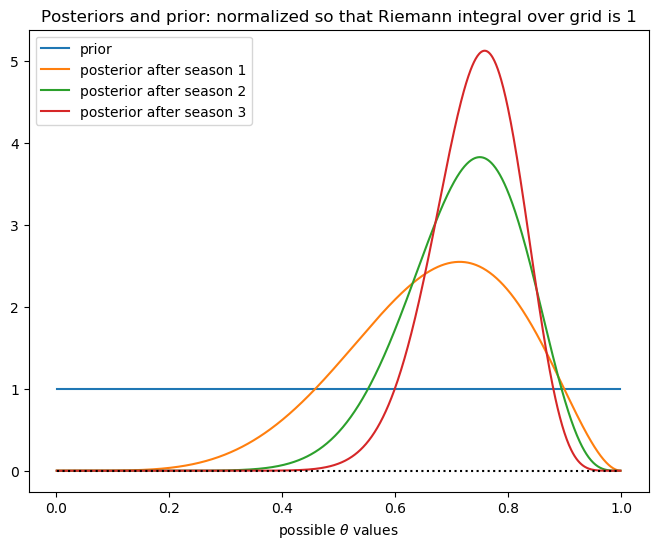

PyObject <matplotlib.legend.Legend object at 0x145833890>

In [82]:
normalize_p_pdf!(prior_pθ,θs)
normalize_p_pdf!(season1_pθ𝕀y,θs)
normalize_p_pdf!(season12_pθ𝕀y,θs)
normalize_p_pdf!(season123_pθ𝕀y,θs)

fig, ax = subplots(1,figsize=(8,6))
ax.plot(θs, prior_pθ, label="prior")
ax.plot(θs, season1_pθ𝕀y, label="posterior after season 1")
ax.plot(θs, season12_pθ𝕀y, label="posterior after season 2")
ax.plot(θs, season123_pθ𝕀y, label="posterior after season 3")
ax.plot(θs, 0 .* θs,"k:")
ax.set_xlabel(L"possible $\theta$ values")
ax.set_title("Posteriors and prior: normalized so that Riemann integral over grid is 1")
ax.legend(loc=2)

Betting on season 4 games with Vegas odds
-----------------------------

Suppose that Vegas has put 8:1 odds for your favoriate team to win in each game of season 4. 
Which means you can either bet for your team to win or to lose on any particular game. 

If you bet that your team will win, then Vegas pays out ＄1/8 for every 
＄1 bet placed. If, instead you bet for your team to lose, Vegas pays 
out ＄8 for every ＄1 bet placed.

Question 1: 
---------------------------
Suppose your planning to put ＄100 on your teams first game of season 4 but are not sure 
if you should bet for them to win or to lose. 

Use the Beta posterior based on the win/lose records of the previous seasons to simulate possible 
$\theta$ values from the posterior. For each of these $\theta$ possibilities simulate the outcome 
of the first game of the season and, based on who wins, determine your winnings when betting ＄100 
to win or lose. Finally use these simulations to find your expected winnings 
(which is negative if you lose the bet) for each of the two betting options.

In [460]:
########
###Simulate thetas from beta prior
sims = beta_rand(23, 8, 100_000, 1)

###Simulate data from binomial data model
win_sims = bernoulli_rand.(sims)

###Initialize winnings



###Simulate winnings 
function sim(win,bet,x)
    ###Initializing the overall winnings and temp(winnings per simulation)
    winnings = 0
    temp = 0
    ###For each of the binomial simulations, simulate the winnings
    for i in 1:max(size(win)[1],1)
        
        if win[i] == 1
            
            if bet == 1
                temp = (1/8) * x
            else temp = (-x)
            end
            
        elseif win[i] == 0
                
            if bet == 0
                temp = 8 * x
            else temp = (-x)
            end
                
        end
        
        winnings = winnings + temp
            
    end   
    return winnings 
end

win_bet = (sim(win_sims,1,100) / 100_000)
loss_bet = (sim(win_sims,0,100) / 100_000)

print("The expected winnings when a bet is placed on the team winning is: ", win_bet,
    ". The average winnings when a bet is       placed on the team losing is: ",  loss_bet, ".")

The expected winnings when a bet is placed on the team winning is: -16.66. The average winnings when a bet is       placed on the team losing is: 133.28.

Question 2: 
---------------------------
Now suppose that in season 4 your team will play a total of 10 games. Suppose further that 
you have decided to bet ＄100 on each game. The first 9 games your going to bet on your team to win. 
The last game of the season your going to bet that your team doesn't win.

Simulate the your total winnings from season 4 (i.e. the sum of winnings from all 10 games) 
based on this betting strategy. 
Make a histrogram of these simulated values.

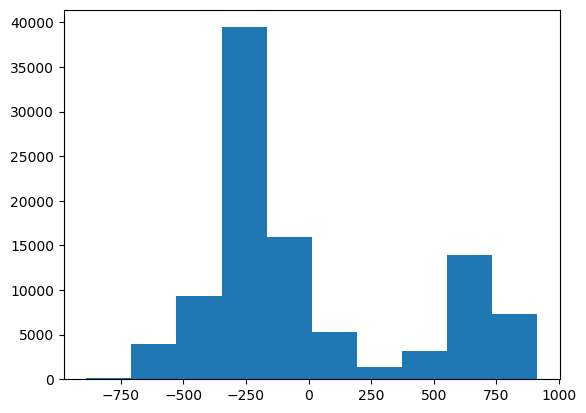

([113.0, 4006.0, 9319.0, 39458.0, 15996.0, 5253.0, 1411.0, 3176.0, 13987.0, 7281.0], [-887.5, -707.5, -527.5, -347.5, -167.5, 12.5, 192.5, 372.5, 552.5, 732.5, 912.5], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x14786af90>, PyObject <matplotlib.patches.Rectangle object at 0x1478585d0>, PyObject <matplotlib.patches.Rectangle object at 0x14786a1d0>, PyObject <matplotlib.patches.Rectangle object at 0x14786a9d0>, PyObject <matplotlib.patches.Rectangle object at 0x147718750>, PyObject <matplotlib.patches.Rectangle object at 0x1477181d0>, PyObject <matplotlib.patches.Rectangle object at 0x147718290>, PyObject <matplotlib.patches.Rectangle object at 0x147889ad0>, PyObject <matplotlib.patches.Rectangle object at 0x147718c10>, PyObject <matplotlib.patches.Rectangle object at 0x147718790>])

In [471]:
temp = 0
total = []

for i in 1:100_000
    sims = beta_rand(23, 8, 12, 1)
    win_sims = bernoulli_rand.(sims)
    first_nine = sim(win_sims[1:9,1], 1, 100)
    tenth = sim([win_sims[10]][:,:], 0, 100)
    temp = first_nine + tenth
    total = append!(total, temp)
end

hist(total)

Find the probability you lose money in season 4.

In [468]:
########
prob = sum(total .< 0) / size(total)[1]

0.6899

Find the expected amount of money you make in season 4.

In [469]:
########
E = mean(total) 

-14.69125